In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, 
                           n_informative=2, n_redundant=0, random_state=42)

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
class LogisticRegressionAdaGrad:
    def __init__(self, learning_rate = 0.1, epochs = 1000, epsilon = 1e-8):
        self.lr = learning_rate 
        self.epochs = epochs
        self.epsilon = epsilon 

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z)) 
    
    def initialize(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0 
        # Accumulator for weights 
        self.G_w = np.zeros(n_features)
        self.G_b = 0 

    def compute_loss(self, y, y_pred):
        eps = 1e-8
        return -np.mean(y * np.log(y_pred + eps) + (1 - y) * np.log(1 - y_pred + eps))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.initialize(n_features)
        self.losses = [] 

        for epoch in range(self.epochs):
            linear_output = np.dot(X, self.weights) + self.bias   
            y_pred = self.sigmoid(linear_output)

            # Gradients 
            dw = np.dot(X.T, (y_pred - y)) / n_samples
            db = np.mean(y_pred - y)

            # Accumulated Squared Gradients 
            self.G_w += dw ** 2
            self.G_b += db ** 2

            # Adjust Learning rate per parameter 
            adjusted_lr_w = self.lr / (np.sqrt(self.G_w) + self.epsilon)
            adjusted_lr_b = self.lr / (np.sqrt(self.G_b) + self.epsilon)

            # Update Parameter 
            self.weights -= adjusted_lr_w * dw 
            self.bias -= adjusted_lr_b * db

            # Save Loss
            loss = self.compute_loss(y, y_pred)
            self.losses.append(loss)

            if epoch % 100 == 0:
                print(f"Epochs {epoch}, Loss: {loss:.4f}")

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)
    
    def predict(self, X):
        return self.predict_proba(X) >= 0.5

In [13]:
model = LogisticRegressionAdaGrad(learning_rate=0.5, epochs=1000)
model.fit(X_train, y_train)

Epochs 0, Loss: 0.6931
Epochs 100, Loss: 0.3428
Epochs 200, Loss: 0.3427
Epochs 300, Loss: 0.3427
Epochs 400, Loss: 0.3427
Epochs 500, Loss: 0.3427
Epochs 600, Loss: 0.3427
Epochs 700, Loss: 0.3427
Epochs 800, Loss: 0.3427
Epochs 900, Loss: 0.3427


In [14]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")

Test Accuracy: 0.88


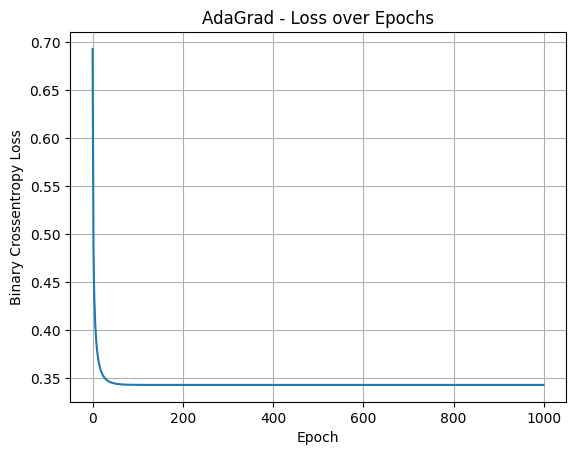

In [15]:
plt.plot(model.losses)
plt.title("AdaGrad - Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy Loss")
plt.grid(True)
plt.show()